In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
boston.data.shape

(506, 13)

In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
import pandas as pd

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
data['Price']=boston.target

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
import xgboost as xgb

In [12]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [13]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [14]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [15]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

C:\Users\Somi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Somi\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [17]:
y_train,y_test

(203    48.5
 441    17.1
 172    23.1
 95     28.4
 54     18.9
 449    13.0
 346    17.2
 351    24.1
 114    18.5
 483    21.8
 138    13.3
 132    23.0
 431    14.1
 343    23.9
 0      24.0
 408    17.2
 150    21.5
 486    19.1
 362    20.8
 258    36.0
 286    20.1
 437     8.7
 20     13.6
 120    22.0
 242    22.2
 335    21.1
 142    13.4
 170    17.4
 241    20.1
 379    10.2
        ... 
 68     17.4
 208    24.4
 492    20.1
 420    16.7
 253    42.8
 334    20.7
 339    19.0
 409    27.5
 111    22.8
 224    44.8
 430    14.5
 32     13.2
 73     23.4
 47     16.6
 126    15.7
 113    18.7
 96     21.4
 225    50.0
 214    23.7
 57     31.6
 123    17.3
 106    19.5
 83     22.9
 17     17.5
 230    24.3
 98     43.8
 476    16.7
 322    20.4
 382    11.3
 365    27.5
 Name: Price, Length: 404, dtype: float64, 410    15.0
 85     26.6
 280    45.4
 422    20.8
 199    34.9
 364    21.9
 5      28.7
 415     7.2
 209    20.0
 284    32.2
 201    24.1
 337    18.5
 34     1

In [18]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [19]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[11:53:06] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [20]:
preds

array([12.021967 , 19.42037  , 24.216532 , 11.0833645, 20.451212 ,
       17.514275 , 18.596458 ,  7.254736 , 12.242276 , 17.586779 ,
       18.825703 , 14.222005 , 11.240848 , 16.982199 , 12.849766 ,
       14.071661 , 13.466291 , 25.69328  , 13.121952 , 10.817097 ,
       11.014268 , 12.023704 , 19.868557 , 24.216532 , 22.885637 ,
       13.918089 , 10.791702 , 14.862403 , 15.584796 , 13.088153 ,
       14.719533 , 21.500261 ,  8.564889 , 14.439252 , 16.130474 ,
       21.307346 , 15.985854 ,  9.419775 , 11.387165 , 24.451538 ,
       17.694933 , 13.653099 , 10.932854 , 23.87084  , 13.394928 ,
       16.08683  , 13.4017105, 14.879117 , 11.789167 , 10.525343 ,
       21.500261 , 16.290161 , 13.189753 ,  7.829775 , 15.143229 ,
       11.342023 , 12.502516 ,  7.4578614, 20.3291   ,  8.167911 ,
       11.816594 , 13.166272 , 12.412043 , 11.714056 , 13.876718 ,
       16.27528  , 15.765525 , 12.70322  , 15.548066 , 17.694933 ,
       13.41295  , 15.2388525, 11.905328 , 16.391476 , 11.7269

In [21]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.170035


In [22]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[11:53:06] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:53:06] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:53:06] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [23]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.750760,0.036149,21.765523,0.028850
1,19.778533,0.077649,19.830758,0.031761
2,18.052812,0.118632,18.157338,0.116036
3,16.458958,0.169187,16.623974,0.191413
4,15.074781,0.183547,15.254608,0.213611


In [24]:
print((cv_results["test-rmse-mean"]).tail(1))

49    3.99692
Name: test-rmse-mean, dtype: float64


In [31]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[12:02:00] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [34]:
import matplotlib.pyplot as plt

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

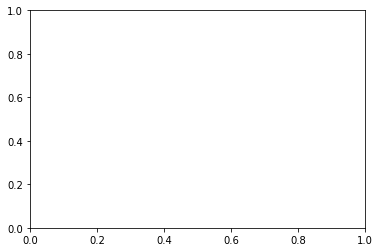

In [35]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [28]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.
